In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive') # подключение к гугл драйв
data = '/content/drive/My Drive/практика' # папка в гугл драйве

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img_height, img_width = 224, 224  # разрешение изображений
batch_size = 32  # размер батча
num_classes = 14 # количество классов в папке

In [5]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet') # создание объекта на основе базовой модели

base_model.trainable = False  # Фиксация базовой модели

# Создание  дополнительных слоев
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 560 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


In [7]:
callback_list = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

# Обучение модели
training_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    callbacks=callback_list
)


Epoch 1/30
17/17 [==============================] - 226s 13s/step - loss: 3.1503 - accuracy: 0.0739 - val_loss: 2.4994 - val_accuracy: 0.1797
Epoch 2/30
17/17 [==============================] - 41s 2s/step - loss: 2.7148 - accuracy: 0.1269 - val_loss: 2.3765 - val_accuracy: 0.2109
Epoch 3/30
17/17 [==============================] - 44s 3s/step - loss: 2.4543 - accuracy: 0.2045 - val_loss: 2.1227 - val_accuracy: 0.2891
Epoch 4/30
17/17 [==============================] - 37s 2s/step - loss: 2.2905 - accuracy: 0.2670 - val_loss: 2.0037 - val_accuracy: 0.4219
Epoch 5/30
17/17 [==============================] - 46s 3s/step - loss: 2.0953 - accuracy: 0.3201 - val_loss: 1.8601 - val_accuracy: 0.4609
Epoch 6/30
17/17 [==============================] - 44s 3s/step - loss: 1.9571 - accuracy: 0.3864 - val_loss: 1.7615 - val_accuracy: 0.5625
Epoch 7/30
17/17 [==============================] - 44s 3s/step - loss: 1.8633 - accuracy: 0.4318 - val_loss: 1.7167 - val_accuracy: 0.5469
Epoch 8/30
17/17 [

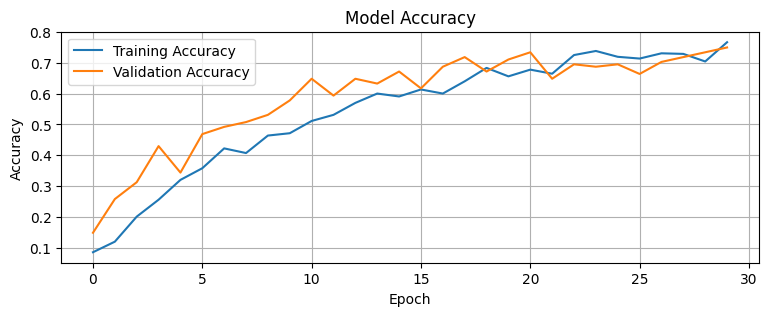

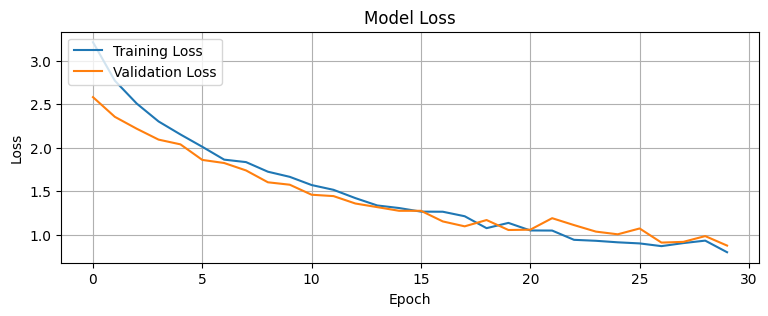

In [12]:
# Извлечение истории обучения
history = training_history.history

# График точности модели
plt.figure(figsize=(9, 3))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# График ошибки модели
plt.figure(figsize=(9, 3))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/тест_практика',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Точность тестирования: {test_accuracy * 100:.2f}%')

Found 210 images belonging to 14 classes.
7/7 [==============================] - 15s 2s/step - loss: 0.7735 - accuracy: 0.8143
Точность тестирования: 81.43%


In [15]:
model.save('/content/drive/My Drive/final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
!pip install pyTelegramBotAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 4.6 MB/s eta 0:00:00


In [17]:
import numpy as np
from PIL import Image
from io import BytesIO
import telebot
from tensorflow.keras.models import load_model

In [18]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
model = tf.keras.models.load_model('/content/drive/My Drive/final_model.h5')

# Инициализация бота
bot = telebot.TeleBot('7373504461:AAF3EOzjf9GptkyFV7EyMtORi9MT7Lx-cOQ')

def classify_image(image):
    img = image.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    return predicted_class

@bot.message_handler(commands=['start'])
def start_message(message):
    bot.send_message(message.chat.id, 'Привет! Отправь мне изображение для классификации.')

@bot.message_handler(content_types=['photo'])
def handle_image(message):
    file_info = bot.get_file(message.photo[-1].file_id)
    image_stream = BytesIO()
    image_stream.write(bot.download_file(file_info.file_path))
    image_stream.seek(0)

    image = Image.open(image_stream)
    predicted_class = classify_image(image)

    response_message = ""
    if predicted_class == 0:
        response_message = 'Астильба'
    elif predicted_class == 1:
        response_message = 'Колокольчик'
    elif predicted_class == 2:
        response_message = 'Черноглазый Сюзан'
    elif predicted_class == 3:
        response_message = 'Календула'
    elif predicted_class == 4:
        response_message = 'Калифорнийский поппи'
    elif predicted_class == 5:
        response_message = 'Гвоздика'
    elif predicted_class == 6:
        response_message = 'Обыкновенная маргаритка'
    elif predicted_class == 7:
        response_message = 'Кореопсис'
    elif predicted_class == 8:
        response_message = 'Одуванчик'
    elif predicted_class == 9:
        response_message = 'Ирис'
    elif predicted_class == 10:
        response_message = 'Роза'
    elif predicted_class == 11:
        response_message = 'Подсолнух'
    elif predicted_class == 12:
        response_message = 'Тюльпан'
    elif predicted_class == 13:
        response_message = 'Водяная лилия'

    bot.send_message(message.chat.id, response_message)

bot.polling()

1/1 [==============================] - 0s 90ms/step
